### Users & Transactions profiling

In [42]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

'0.20.3'

In [43]:
%matplotlib inline

## Show part of transactions file

In [2]:
!head transactions.csv

user_id,type,date
2e23e35fe0792367688afae1cc53888a,DT,2016-02-20
3ba7ca60e456bc7b51ebad18b5c48d8e,CT,2016-02-02
f07d0faffa7d7e53af39e234e8ed0fab,CT,2016-01-12
76f311b289ab20e3c1d5a8e2f8fb4407,PT,2016-01-27
f37e9faf22fa9dd12a43c32afeae5df8,DD,2016-06-23
b0ecad3cd12ae1fdfd6121efe37e3e2e,CT,2016-02-09
bdab23acdfa69f28e14afc146c5619d2,FT,2016-01-28
0b18605ed201c96a6ba3e33927f5b4b7,DD,2016-08-16
8cf788a69b24f1ea70735143e33b3f29,PT,2016-02-10


## Read transactions file

In [24]:
transactions = pd.read_csv('transactions.csv', sep=',')

## Call pandas profiling:
+ Understand Data structure
+ Understand the content
+ Distribution the fields context
+ Detection of missing values

In [10]:
pandas_profiling.ProfileReport(transactions)

Number of variables,3
Number of observations,23721
Total Missing (%),0.0%
Total size in memory,556.0 KiB
Average record size in memory,24.0 B
Numeric,0
Categorical,3
Date,0
Text (Unique),0
Rejected,0
Distinct count,332


In [13]:
min(transactions['date'])

'2016-01-01'

In [14]:
max(transactions['date'])

'2016-11-27'

### Transactions profiling:
* We have `5` type of transactions
* `7077` people make transaction
* Range of transactions available in the data between `2016-01-01` to `2016-11-27`

## Read transaction type file

In [4]:
transaction_type = pd.read_csv('transaction_types.csv', sep=',')

In [11]:
pandas_profiling.ProfileReport(transaction_type)

In [6]:
transaction_type

,type,explanation
0,CT,Credit Transfer (Incoming SEPA Transfer)
1,PT,Card Transaction
2,DT,Direct Transfer (Outgoing SEPA Transer)
3,DD,Direct Debit
4,FT,MoneyBeam


#### Explaination of every type of transactions:

+ Could be linked to transactions feeds or just took it as an information to understand the different type of transactions

### Read Users file

In [25]:
users = pd.read_csv('users.csv', sep=',')

In [26]:
users.head(5)

,user_id,invited,sign_up,kyc_initiated,kyc_completed,card_activated
0,ad556af8adaa799e8d7b63bbf7fc654e,NaN,2016-01-11,2016-01-11,2016-01-11,2016-01-14
1,3ca749229385323affc0d78348f5d1a0,NaN,2016-01-27,2016-01-28,2016-01-28,2016-07-28
2,73ea685cc99dd1ae1c006d84d99c262a,NaN,2016-01-06,2016-01-06,NaN,NaN
3,d17d212296ec30df1313fde54a6dec8f,NaN,2016-02-05,NaN,NaN,NaN
4,054f9f2e5a9065e9693e82899a16b696,NaN,2016-01-30,2016-02-25,NaN,NaN


In [12]:
pandas_profiling.ProfileReport(users)

Number of variables,6
Number of observations,10645
Total Missing (%),26.6%
Total size in memory,499.1 KiB
Average record size in memory,48.0 B
Numeric,0
Categorical,5
Date,0
Text (Unique),1
Rejected,0
Distinct count,304


### Users feed understanding:
+ card activated field missing `31%` in the feed
+ Invited field is missing with `83.7%`
+ Ky_completed is missing with `27.8%`
+ ky_initiated is missing with `16.6%`

In [27]:
transactions_users = transactions.merge(users, left_on='user_id', right_on='user_id', how='left')

In [28]:
transactions_users

,user_id,type,date,invited,sign_up,kyc_initiated,kyc_completed,card_activated
0,2e23e35fe0792367688afae1cc53888a,DT,2016-02-20,NaN,2016-01-23,2016-01-23,2016-01-25,2016-01-29
1,3ba7ca60e456bc7b51ebad18b5c48d8e,CT,2016-02-02,NaN,2016-01-25,2016-01-25,2016-01-25,2016-01-31
2,f07d0faffa7d7e53af39e234e8ed0fab,CT,2016-01-12,NaN,2016-01-10,2016-01-10,2016-01-10,2016-01-17
3,76f311b289ab20e3c1d5a8e2f8fb4407,PT,2016-01-27,2016-01-11,2016-01-11,2016-01-11,2016-01-11,2016-01-15
4,f37e9faf22fa9dd12a43c32afeae5df8,DD,2016-06-23,NaN,2016-01-15,2016-02-06,2016-03-04,2016-03-09
5,b0ecad3cd12ae1fdfd6121efe37e3e2e,CT,2016-02-09,2016-01-25,2016-01-25,2016-01-26,2016-01-26,2016-10-27
6,bdab23acdfa69f28e14afc146c5619d2,FT,2016-01-28,NaN,2016-01-06,2016-01-06,2016-01-06,2016-01-12
7,0b18605ed201c96a6ba3e33927f5b4b7,DD,2016-08-16,2016-01-20,2016-01-22,2016-01-22,2016-01-22,2016-01-28
8,8cf788a69b24f1ea70735143e33b3f29,PT,2016-02-10,NaN,2016-01-31,2016-02-01,2016-02-01,2016-02-05
9,d5f0bb7e37087fa1438bf7d229241818,DD,2016-02-17,NaN,2016-01-30,2016-02-02,2016-02-02,2016-02-06


### A simple use case to read of one user `8cf788a69b24f1ea70735143e33b3f29` :
+ This user signed up on 31st of January 2016, His/Her kyc initiation and completed in the same day on 1st of February 2016 then on the 5th his card got activated.
+ He/She got Credit Transfer (Incoming SEPA Transfer) within his/her card on 8th of February 2016 
+ He/She made a transaction with her/his card on 10th of February 2016

In [30]:
transactions_users[transactions_users['user_id'] == '8cf788a69b24f1ea70735143e33b3f29']

,user_id,type,date,invited,sign_up,kyc_initiated,kyc_completed,card_activated
8,8cf788a69b24f1ea70735143e33b3f29,PT,2016-02-10,NaN,2016-01-31,2016-02-01,2016-02-01,2016-02-05
18658,8cf788a69b24f1ea70735143e33b3f29,CT,2016-02-08,NaN,2016-01-31,2016-02-01,2016-02-01,2016-02-05


In [37]:
transactions_users.describe()

,user_id,type,date,invited,sign_up,kyc_initiated,kyc_completed,card_activated
count,23721,23721,23721,4885,23721,23692,23714,23506
unique,7077,5,332,119,45,204,202,298
top,29a024fe1558422944fe85ad8479f7d1,CT,2016-02-02,2016-01-27,2016-01-27,2016-02-02,2016-02-02,2016-02-11
freq,5,7002,596,176,787,764,759,728


### Create a function to plot the categorical types

In [60]:
def plot_transaction_per_type(transaction_type, title, x_title, y_title, top_n=4, output_filename="plot.png"):
    transaction_by_type = transaction_type.value_counts()
    fig, ax = plt.subplots()
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    ax.set_title(title)
    transaction_by_type[:top_n].plot(ax=ax, kind='bar')
    fig.savefig(output_filename)
    fig.show()    

### The most occurent transaction type made by our users is `CT` , `PT` and `DT`

/Users/mozilla/virtualenvs/mermi/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


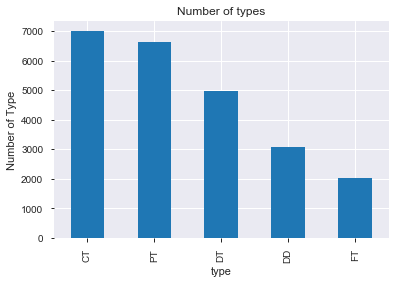

In [63]:
plot_transaction_per_type(transactions_users['type'], "Number of types", 
                         "type", 
                         "Number of Type", 30, "categorical_transaction_type.png")

In [66]:
transactions_users[transactions_users['user_id'] == '2e23e35fe0792367688afae1cc53888a']

,user_id,type,date,invited,sign_up,kyc_initiated,kyc_completed,card_activated
0,2e23e35fe0792367688afae1cc53888a,DT,2016-02-20,NaN,2016-01-23,2016-01-23,2016-01-25,2016-01-29
5954,2e23e35fe0792367688afae1cc53888a,PT,2016-01-29,NaN,2016-01-23,2016-01-23,2016-01-25,2016-01-29
12695,2e23e35fe0792367688afae1cc53888a,CT,2016-01-27,NaN,2016-01-23,2016-01-23,2016-01-25,2016-01-29


## Visualize when users got their card activated

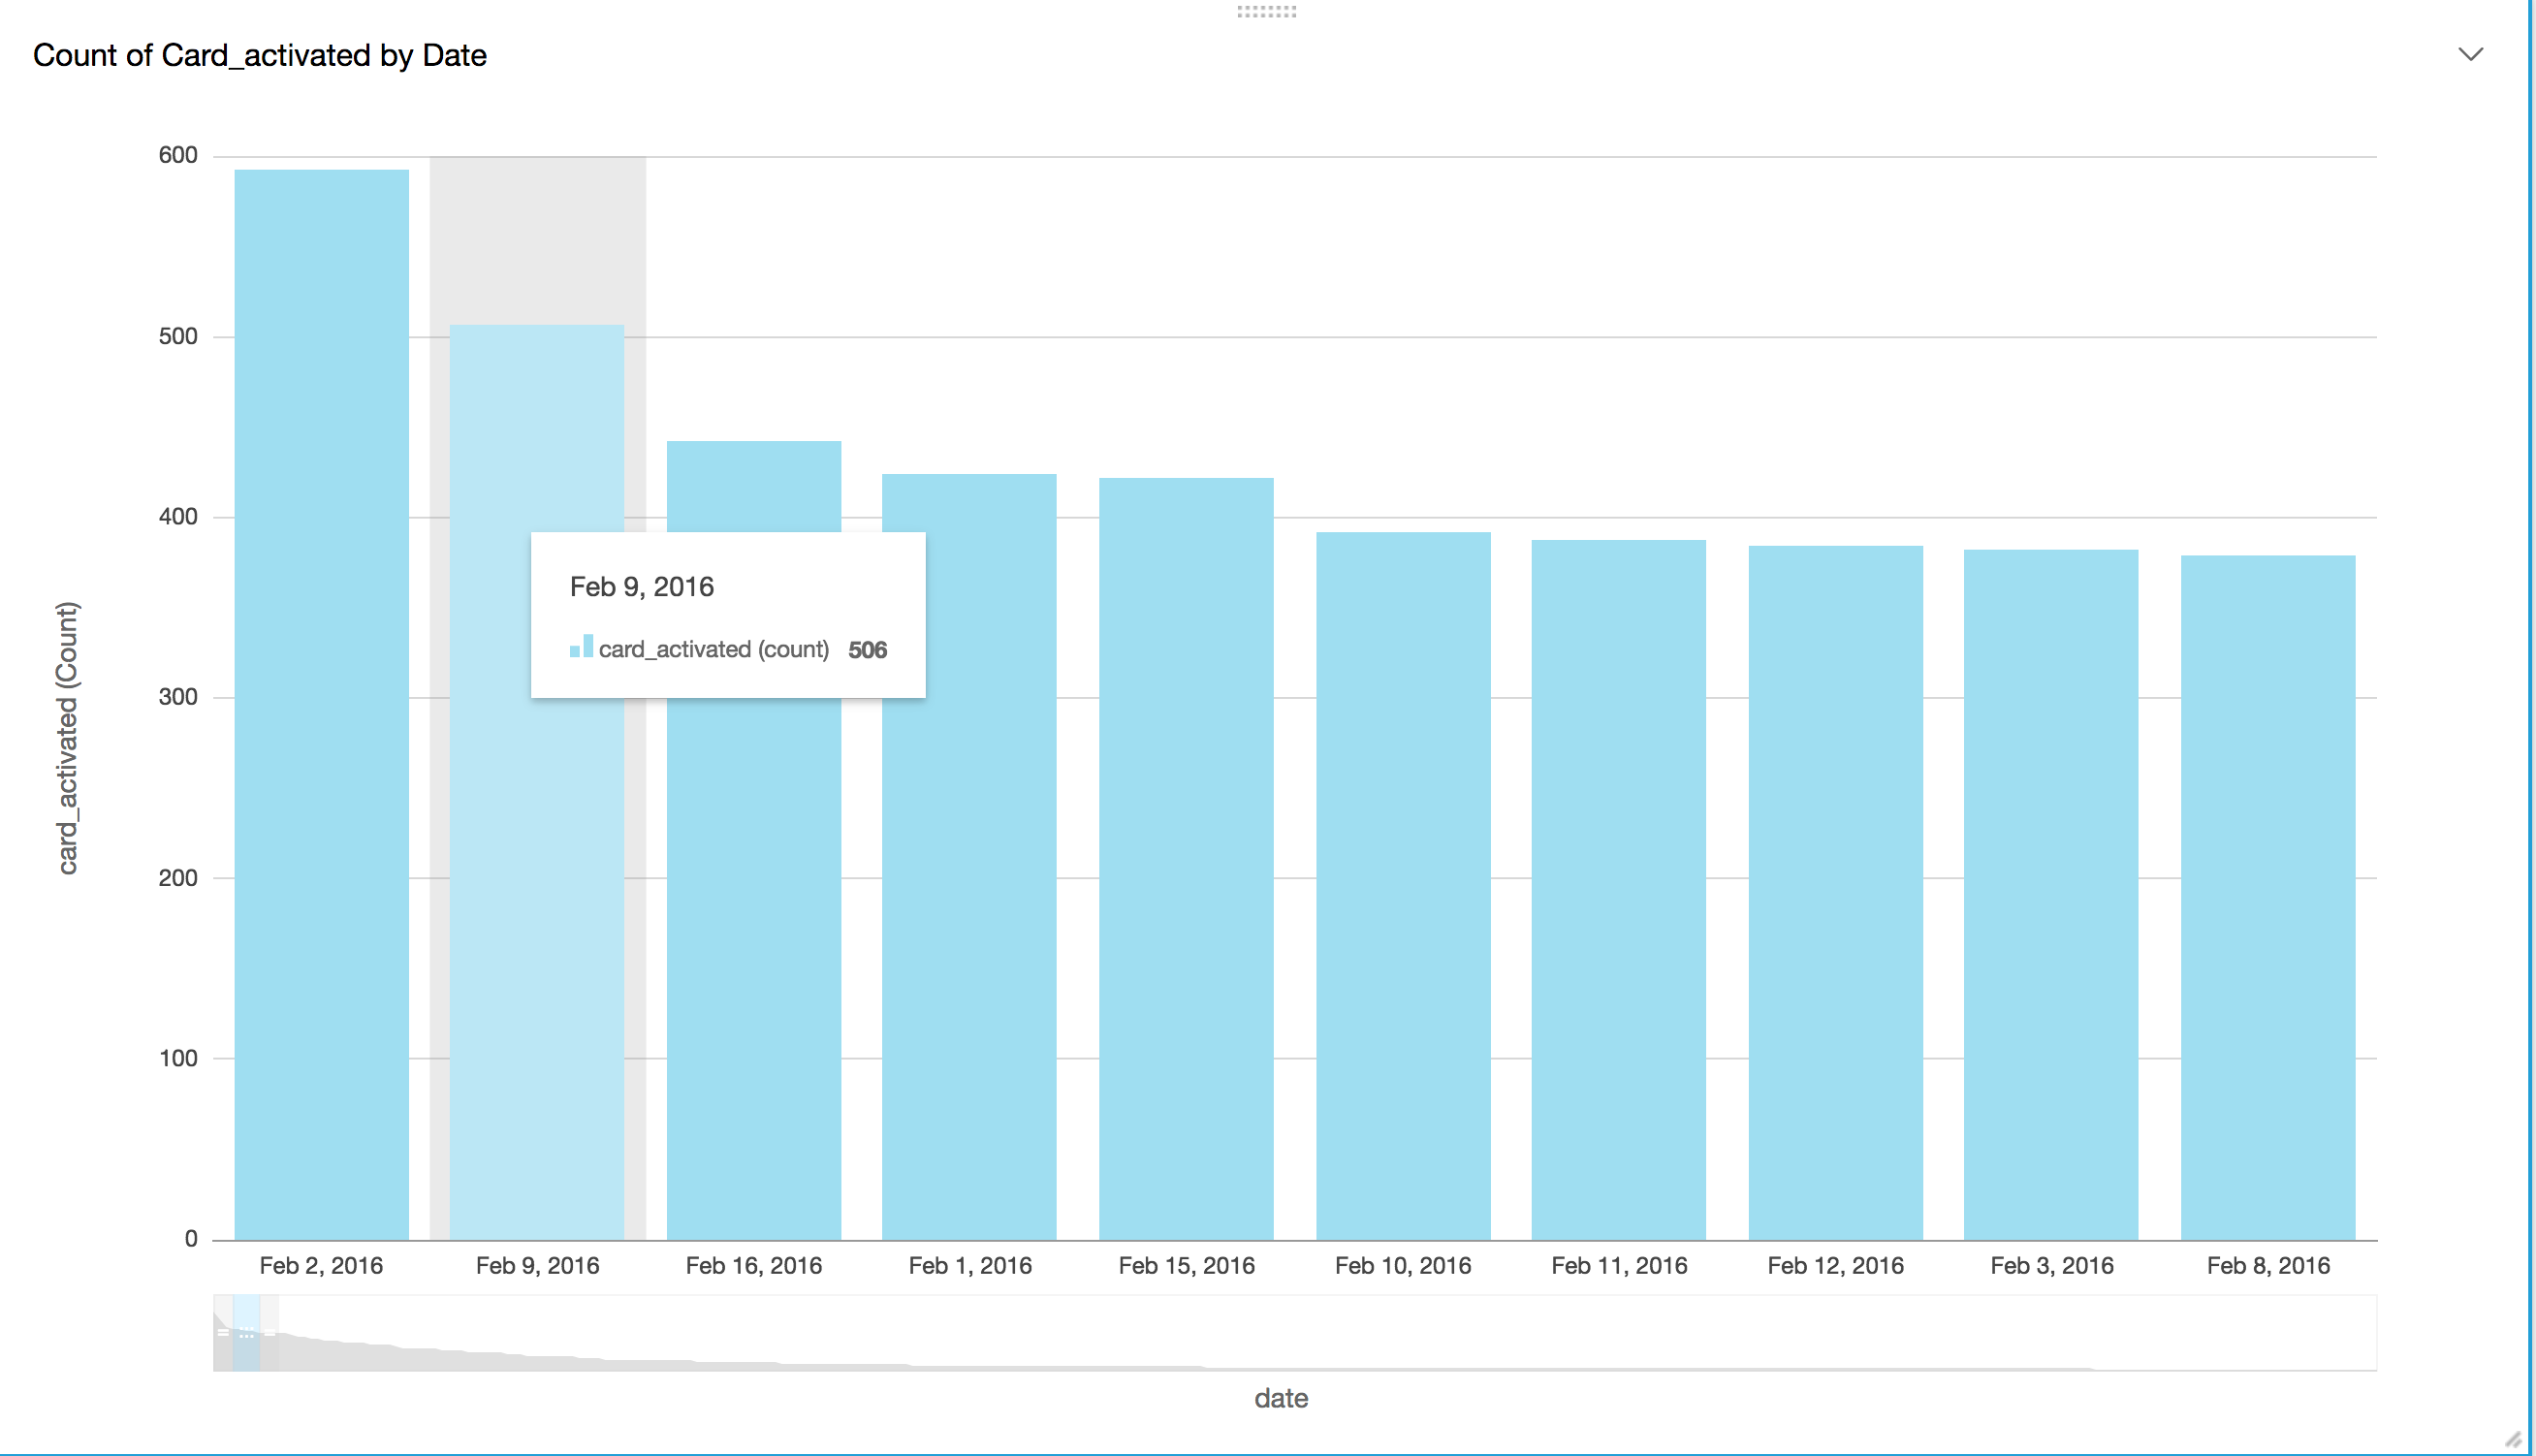

## Number of users signed up per date of sign up
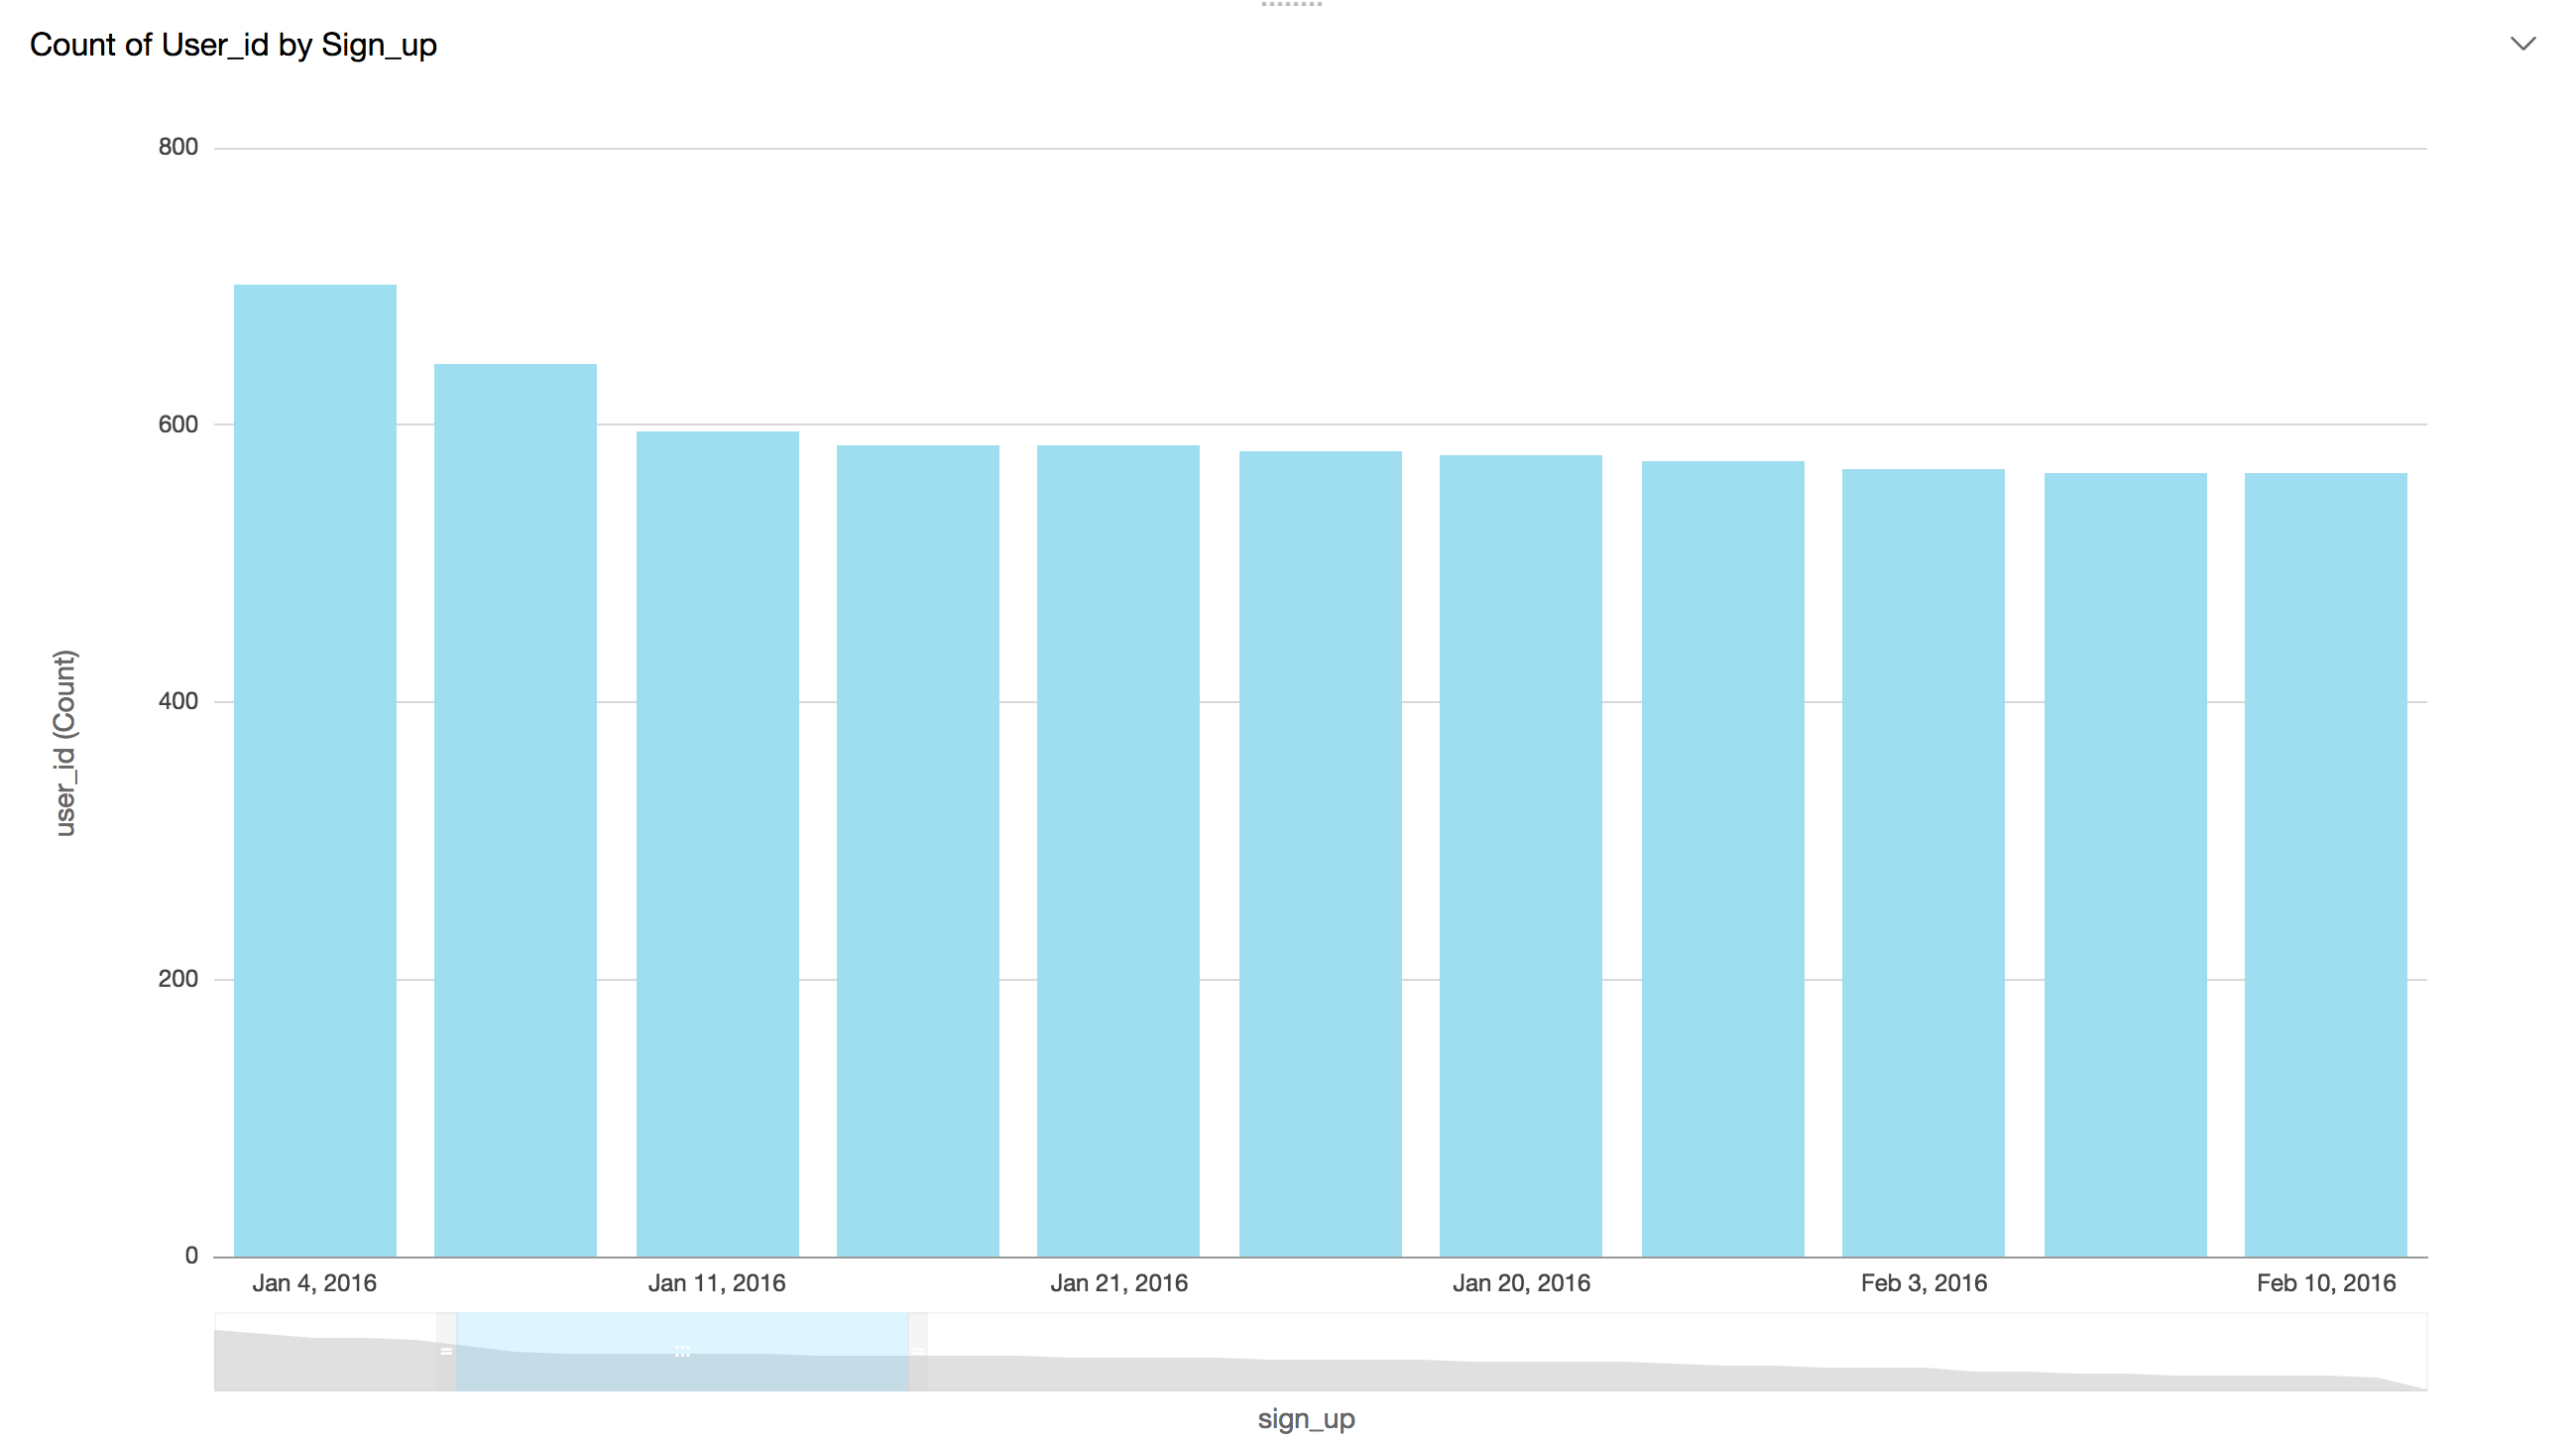